In [39]:
import numpy as np
from PIL import Image
import cv2
from skimage import draw
import scipy.ndimage as pyimg

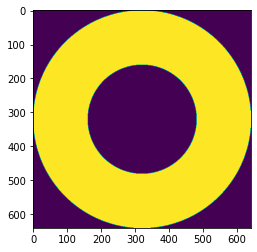

In [68]:
import matplotlib.pyplot as plt
from skimage import draw
arr = np.zeros((640, 640))
stroke = 3
# Create an outer and inner circle. Then subtract the inner from the outer.
radius = 320
inner_radius = 160
outer_radius = radius
ri, ci = draw.circle(320, 320, radius=inner_radius, shape=arr.shape)
ro, co = draw.circle(320, 320, radius=outer_radius, shape=arr.shape)
arr[ro, co] = 1
arr[ri, ci] = 0
plt.imshow(arr)
plt.show()


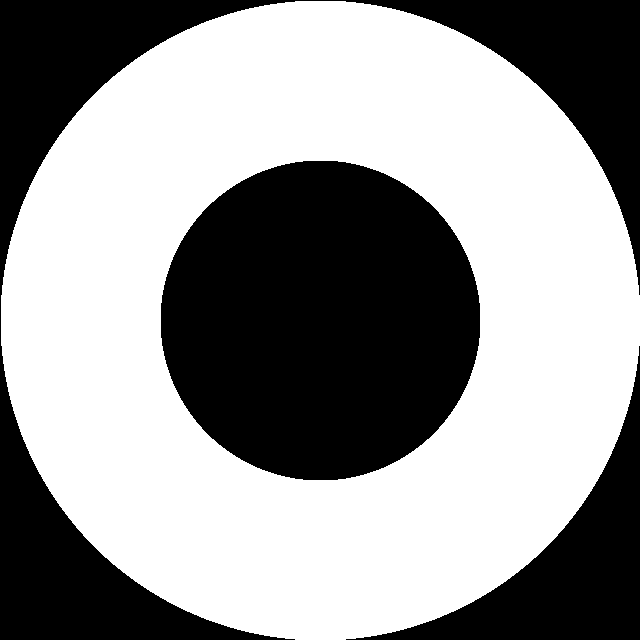

In [69]:
Image.fromarray((arr*255).astype(np.uint8))

In [70]:
arr1 = arr[:320, :320]
arr2 = arr[:320, 320:]
arr3 = arr[320:, :320]
arr4 = arr[320:, 320:]

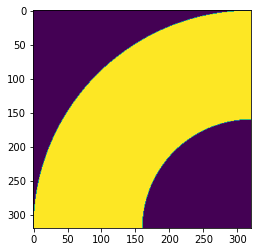

In [71]:
plt.imshow(arr1)
plt.show()

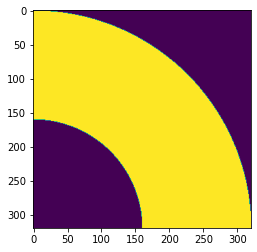

In [72]:
plt.imshow(arr2)
plt.show()

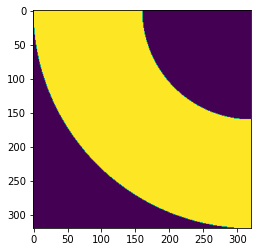

In [73]:
plt.imshow(arr3)
plt.show()

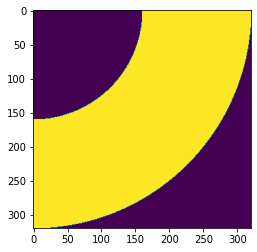

In [74]:
plt.imshow(arr4)
plt.show()

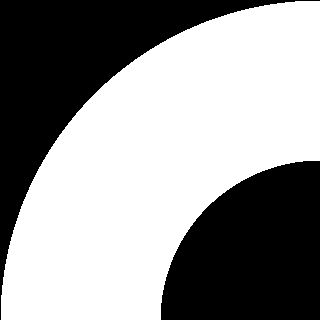

In [75]:
Image.fromarray((arr1*255).astype(np.uint8))

In [76]:
def text_image_preprocessing(arr):
    x = np.zeros(shape = (arr.shape[0], arr.shape[1], 3))
    x[:, :, 0] = arr
    x[:, :, 1] = arr
    x[:, :, 2] = arr
    I = (x*255).astype(np.uint8)
    BW = I[:,:,0] > 127
    G_channel = pyimg.distance_transform_edt(BW)
    G_channel[G_channel>32]=32
    B_channel = pyimg.distance_transform_edt(1-BW)
    B_channel[B_channel>200]=200
    I[:,:,1] = G_channel.astype('uint8')
    I[:,:,2] = B_channel.astype('uint8')
    return Image.fromarray(I)

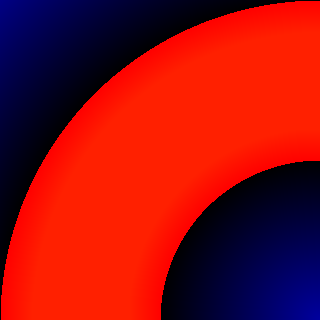

In [77]:
text_image_preprocessing(arr1)

In [78]:
import os
import shutil

dirpath = '/home/abhirag/cv_project/experiment/data/created_augment/'

if os.path.exists(dirpath):
    shutil.rmtree(dirpath)
    
os.mkdir(dirpath)

for a, b in zip([arr1, arr2, arr3, arr4], ['5', '6', '7', '8']):
    text_image_preprocessing(a).save(os.path.join(dirpath, b + '.png'))